<a href="https://colab.research.google.com/github/as-bestinclass/pythonDataSci/blob/main/AirBnB_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Dataset

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataSetAS/AB_NYC_2019.csv')

In [24]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
na_counts = df.isna().sum()
print(na_counts)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


#1-4

1) Calculate How many properties in each neighbour hood group

In [7]:
unique_values = df['neighbourhood_group'].unique()
print(unique_values)

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']



2) Which Neighbour Hood Group Has highest prices

In [8]:
import matplotlib.pyplot as plt

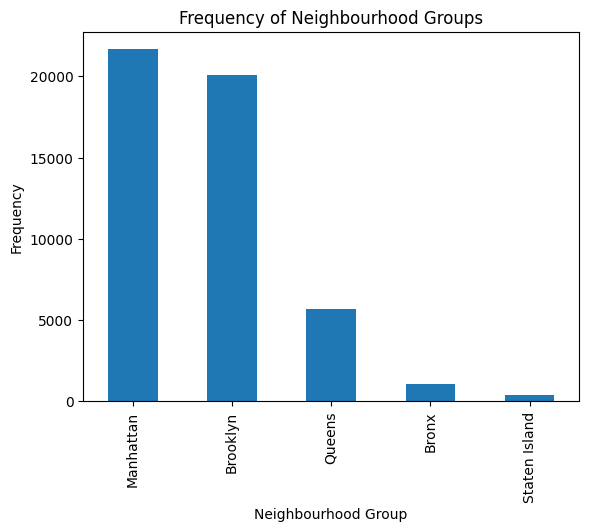

In [9]:
frequency = df['neighbourhood_group'].value_counts()
frequency.plot(kind='bar')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Frequency')
plt.title('Frequency of Neighbourhood Groups')
plt.show()

3) Which Neighboorhood group has lowest prices

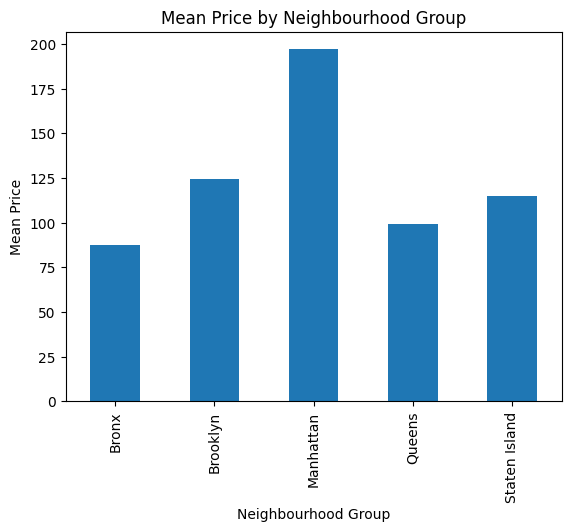

In [10]:
mean_price = df.groupby('neighbourhood_group')['price'].mean()
mean_price.plot(kind='bar')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Mean Price')
plt.title('Mean Price by Neighbourhood Group')
plt.show()


4) Highest and lowest price airbnb in each Neighbour Hood Group

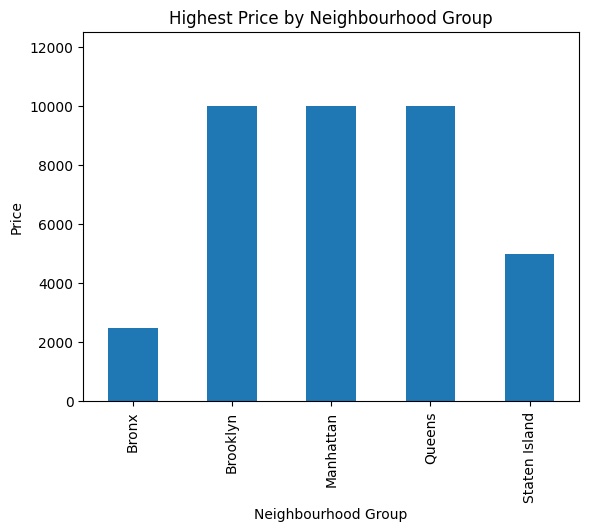

In [16]:
highest_price = df.groupby('neighbourhood_group')['price'].max()
highest_price.plot(kind='bar')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.title('Highest Price by Neighbourhood Group')

# Adjusting y-axis range to 1.25x the highest price
highest_price_range = highest_price.max() * 1.25
plt.ylim(0, highest_price_range)

# Adding id as x-ticks
plt.xticks(range(len(highest_price.index)), highest_price.index)
plt.show()


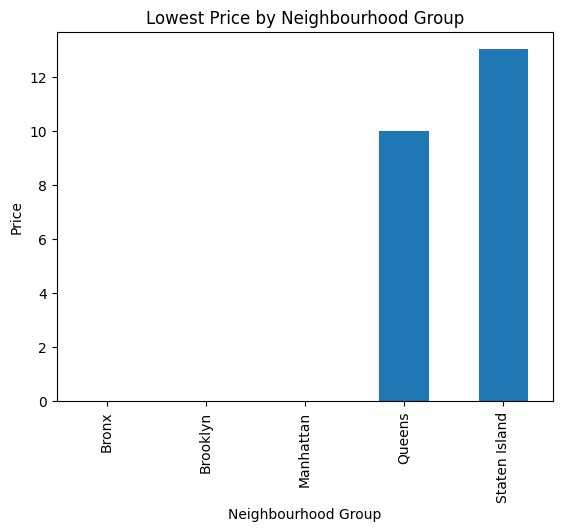

In [17]:
lowest_price = df.groupby('neighbourhood_group')['price'].min()
lowest_price.plot(kind='bar')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.title('Lowest Price by Neighbourhood Group')

# Adding id as x-ticks
plt.xticks(range(len(lowest_price.index)), lowest_price.index)
plt.show()


#5-8

5) Which Host has Highest count of properties

In [19]:
#5) Which Host has Highest count of properties
most_frequent_host_id = df['host_id'].value_counts().idxmax()
print(most_frequent_host_id)

219517861


6) Which neighbourhood is most expensive and cheapest

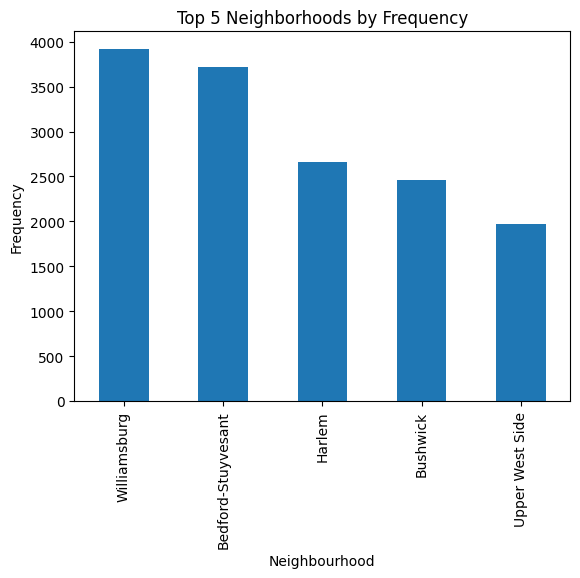

In [21]:
top_neighborhoods = df['neighbourhood'].value_counts().nlargest(5)
top_neighborhoods.plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Frequency')
plt.title('Top 5 Neighborhoods by Frequency')
plt.show()

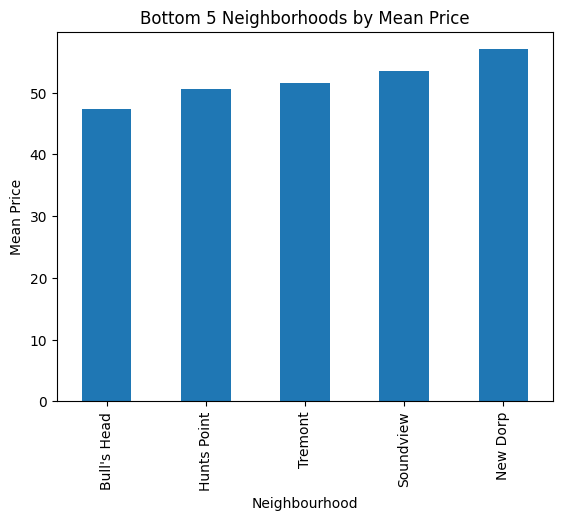

In [22]:
bottom_neighborhoods = df.groupby('neighbourhood')['price'].mean().nsmallest(5)
bottom_neighborhoods.plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Price')
plt.title('Bottom 5 Neighborhoods by Mean Price')
plt.show()



7) Count different type of room_type and do a pie chart showing % of each room type in overall dataset

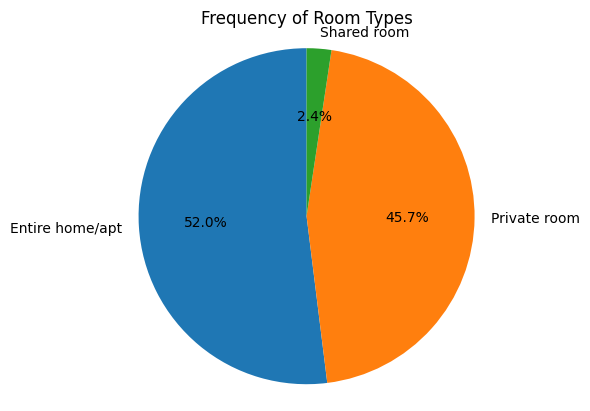

In [23]:
room_type_counts = df['room_type'].value_counts()
labels = room_type_counts.index
sizes = room_type_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Frequency of Room Types')
plt.show()

8) scatter plot between longitutude and latitude for different neighbourhood groups

In [26]:
highest_latitude = df['latitude'].max()
lowest_latitude = df['latitude'].min()

highest_longitude = df['longitude'].max()
lowest_longitude = df['longitude'].min()

print("Highest Latitude:", highest_latitude)
print("Lowest Latitude:", lowest_latitude)
print("Highest Longitude:", highest_longitude)
print("Lowest Longitude:", lowest_longitude)


Highest Latitude: 40.91306
Lowest Latitude: 40.49979
Highest Longitude: -73.71299
Lowest Longitude: -74.24442


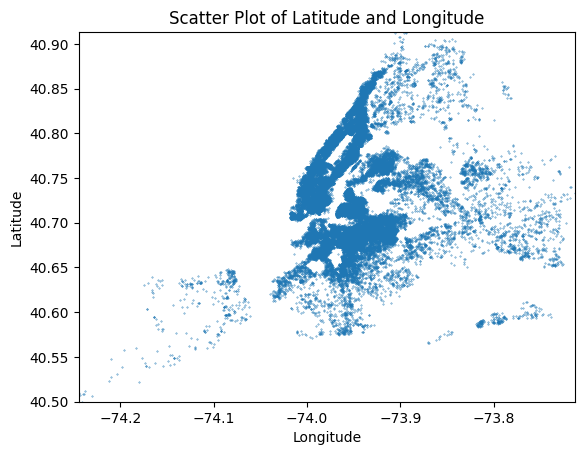

In [28]:
plt.scatter(df['longitude'], df['latitude'], s=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlim(-74.24442, -73.71299)
plt.ylim(40.49979, 40.91306)
plt.show()

#9-11

9) scatter plot between longitutude and latitude for different room_types

10) Do a similar plot to this 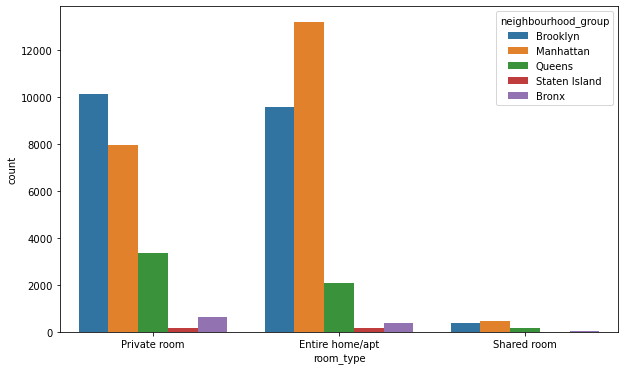

11)  room_type vs price bar chart for the mean and highest and lowest